from google.colab import files
uploaded = files.upload()

In [1]:
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import io
#df = pd.read_csv(io.BytesIO(uploaded['train.csv']))
df = pd.read_csv('train.csv')

In [4]:
df.head()

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama


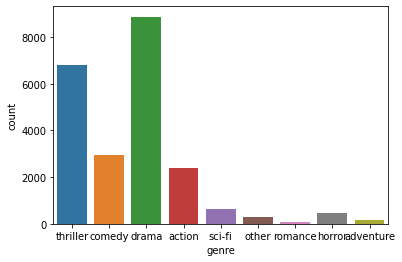

In [5]:
sns.countplot(x='genre',data=df)

As we can see that Drama has the highest count

In [6]:
df.drop('id',axis=1,inplace=True)

In [7]:
df.head()

,text,genre
0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,"t, summa cum laude and all. And I'm about to l...",comedy
2,"up Come, I have a surprise.... She takes him ...",drama
3,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,"nd dismounts, just as the other children reach...",drama


Categorical Mapping

In [8]:
df['genre'].sort_values().unique()

array(['action', 'adventure', 'comedy', 'drama', 'horror', 'other',
       'romance', 'sci-fi', 'thriller'], dtype=object)

In [9]:
genre_mapping={'action':1, 'adventure':2, 'comedy':3, 'drama':4, 'horror':5, 'other':0,
       'romance':6, 'sci-fi':7, 'thriller':8}

df['genre']=df['genre'].map(genre_mapping)       

In [10]:
df.head()

,text,genre
0,"eady dead, maybe even wishing he was. INT. 2ND...",8
1,"t, summa cum laude and all. And I'm about to l...",3
2,"up Come, I have a surprise.... She takes him ...",4
3,ded by the two detectives. INT. JEFF'S APARTME...,8
4,"nd dismounts, just as the other children reach...",4


NLP 

In [11]:
# Importing essential libraries for performing Natural Language Processing on given dataset
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dishaa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Text Cleaning


1.   Replace All the special charecters with space and change to lower
2.   Split into words
3.   Remove Stop Words
4.   Stemming
5.   Make the Corpus by joining the words



In [ ]:
# Cleaning the text
corpus = []
ps = PorterStemmer()

for i in range(0, df.shape[0]):

  # Cleaning special character from the dialog/script
  dialog = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df['text'][i])

  # Converting the entire dialog/script into lower case
  dialog = dialog.lower()

  # Tokenizing the dialog/script by words
  words = dialog.split()

  # Removing the stop words
  dialog_words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in dialog_words]

  # Joining the stemmed words
  dialog = ' '.join(words)

  # Creating a corpus
  corpus.append(dialog)

In [ ]:
len(corpus)

In [ ]:
df[df['genre']==4]

 Formation of WORDCLOUD

In [ ]:
drama=[]
comedy=[]
action=[]

for d in list(df[df['genre']==4].index):
  drama.append(corpus[d])

for a in list(df[df['genre']==1].index):
  action.append(corpus[a])  

for c in list(df[df['genre']==3].index):
  comedy.append(corpus[c])  

In [ ]:
drama_words = ''
action_words = ''
comedy_words = ''
for i in range(0, 3):
  drama_words += drama[i]
  action_words += action[i]
  comedy_words += comedy[i]

In [ ]:
action_words

In [ ]:
# Creating wordcloud for drama genre
from wordcloud import WordCloud
wordcloud1 = WordCloud(background_color='white', width=3000, height=2500).generate(drama_words)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("DRAMA genre ")
plt.show()

In [ ]:
wordcloud2=WordCloud(background_color='white', width=3000, height=2500).generate(action_words)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Action genre ")
plt.show()

In [ ]:
wordcloud3=WordCloud(background_color='white', width=3000, height=2500).generate(comedy_words)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Comedy genre ")
plt.show()

Changing into Word Vectors

In [ ]:
## Bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer(max_features=10000,ngram_range=(1, 2))
X=cv.fit_transform(corpus).toarray()

In [ ]:
type(X)

In [ ]:

y = df['genre'].values

In [ ]:
type(y)

Model Building

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


In [ ]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

In [ ]:
pred=nb_classifier.predict(X_test)
pred

In [ ]:
# Calculating Accuracy
from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_test, pred)
print(score1)
print("Accuracy score is: {} %".format(round(score1*100),2))

PREDICTION

In [ ]:

def prediction(sample_script):
  sample_script = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_script)
  sample_script = sample_script.lower()
  sample_script_words = sample_script.split()
  sample_script_words = [word for word in sample_script_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_script = [ps.stem(word) for word in sample_script_words]
  final_script = ' '.join(final_script)

  temp = cv.transform([final_script]).toarray()
  return nb_classifier.predict(temp)[0]

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import io
test = pd.read_csv('test.csv')

In [ ]:
test.head()

In [ ]:
test.drop('id',axis=1,inplace=True)

In [ ]:
test.head()

In [ ]:
test.shape

Generation Random Row index for Prediction

In [ ]:
# For generating random integer
from random import randint
row=randint(0,test.shape[0]-1)
sample_script=test['text'][row]
print('Sample Script is --> {} '.format(sample_script))
value=prediction(sample_script)
print('\n')
print('Movie_Genre--> {} '.format(list(genre_mapping.keys())[value]))

Pickle the file

In [ ]:
import pickle
# open a file, where you ant to store the data
file = open('movie_genre_model.pkl', 'wb')

# dump information to that file
pickle.dump(nb_classifier, file)

In [ ]:
import pickle
# open a file, where you ant to store the data
file = open('count_vectorize.pkl', 'wb')

# dump information to that file
pickle.dump(cv, file)